In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn import ensemble
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay


In [2]:
x, y= fetch_california_housing(return_X_y= True, as_frame=True)

# Use only 100 datasets
x = x[:100]
y = y[:100]
print("X\n",x)
print("Y\n",y)


X
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0   8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1   8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2   7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3   5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4   3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
..     ...       ...       ...        ...         ...       ...       ...   
95  2.0096      36.0  2.294016   1.066294      3469.0  1.493328     37.80   
96  2.8345      31.0  3.894915   1.127966      2048.0  1.735593     37.82   
97  2.0062      29.0  3.681319   1.175824       202.0  2.219780     37.81   
98  1.2185      22.0  2.945600   1.016000      2024.0  1.619200     37.82   
99  2.6104      37.0  3.707143   1.107143      1838.0  1.875510     37.82   

    Longitude  
0     -122.23  
1     -122.22  
2     -122.24  
3     -1

Text(0.5, 1.0, 'Partial Dependence for AveRooms')

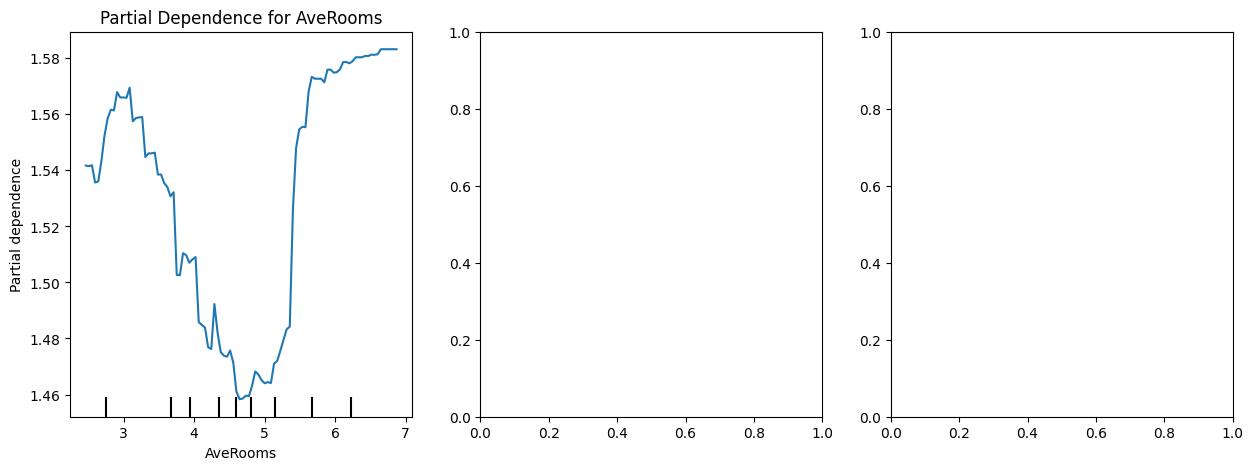

In [3]:
# Use RandomForestRegressor
rf = ensemble.RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x, y)

# The target variable is the median house value
""" # TODO: yes?
 0     4.526
1     3.585
2     3.521
3     3.413
4     3.422
      ...
95    1.300
96    1.838
97    1.250
98    1.700
99    1.931
Name: MedHouseVal, Length: 100, dtype: float64
"""

# Plot PDP of the feature average number of rooms per household: AveRooms
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
tree_disp = PartialDependenceDisplay.from_estimator(rf, x, ["AveRooms"], ax=axes[0])
axes[0].set_title('Partial Dependence for AveRooms')


In [4]:
# Plot ICD of the feature average number of household members: AveOccup
icd = PartialDependenceDisplay.from_estimator(rf, x, ["AveOccup"], ax=axes[1], kind='individual')
axes[1].set_title('ICD for AveOccup')



# Plot the relationship between average number of bedrooms per household and median house age
axes[2].scatter(x['AveBedrms'], x['HouseAge'])
axes[2].set_xlabel('Average Number of Bedrooms per Household')
axes[2].set_ylabel('House age')
axes[2].set_title('Relationship between AveBedrms and House age')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [5]:
import pandas as pd
import numpy as np

data = {
    'x': [5, 15, 25, np.nan]  # Creating a dictionary with 'x' column and values
}

df = pd.DataFrame(data)  # Creating a DataFrame from the dictionary
print(df['x'].mean())
print(np.mean(df['x']))
#print([5, 15, 25, np.nan].value)
#print(df)

15.0
15.0
